<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Обращает-на-себя-внимание-большое-количество-пропущенных-значений." data-toc-modified-id="Обращает-на-себя-внимание-большое-количество-пропущенных-значений.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обращает на себя внимание большое количество пропущенных значений.</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты-и-добавление-результатов-в-таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("https://code.s3.yandex.net/datasets/real_estate_data.csv",sep='\t')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Проверим данные по столбцам.

In [2]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проверим данные в каждом столбце.

In [3]:
def series_analise(series):
    print(series.name)
    try: # при попадении данных не верного типа в расчет посчитает только то что можно посчитать в любом случае.
        return f"Для этого столбца Среднеее значение:{series.mean()}" + "\n" + f"Максимальное значение: {series.max()}"+ "\n" + f"Минимальное значение: {series.min()}"+ "\n" + f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"+ "\n" + f"Пропущенные значения: {series.isna().sum()}"
    except:
        return f"Для этого столбца" + "\n" f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}" + "\n" + f"Пропущенные значения: {series.isna().sum()}"
for i in data.columns:
    print(series_analise(data[i]))
    print()
    print()
    print()

total_images
Для этого столбца Среднеее значение:9.858475041140977
Максимальное значение: 50
Минимальное значение: 0
Всего наблюдений: 23699
Уникальные значения: [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
Пропущенные значения: 0



last_price
Для этого столбца Среднеее значение:6541548.771551542
Максимальное значение: 763000000.0
Минимальное значение: 12190.0
Всего наблюдений: 23699
Уникальные значения: [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
Пропущенные значения: 0



total_area
Для этого столбца Среднеее значение:60.34865099793241
Максимальное значение: 900.0
Минимальное значение: 12.0
Всего наблюдений: 23699
Уникальные значения: [108.    40.4   56.   ...  66.86 133.81  76.75]
Пропущенные значения: 0



first_day_exposition
Для этого столбца
Всего наблюдений: 23699
Уникальные значения: ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-0

Смотрим пропуски по столбцам.


In [4]:
isnul_table=data.isnull().sum()  
isnul_table.sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

### Обращает на себя внимание большое количество пропущенных значений. 

* is_apartment            20924  апартаменты
* parks_nearest           15620  расстояние до ближайшего парка (м)
* ponds_nearest           14589  расстояние до ближайшего водоёма (м)
* balcony                 11519  балконы
* ceiling_height           9195  высота потолков (м)
* airports_nearest         5542  расстояние до аэропорта (м)
* cityCenters_nearest      5519  расстояние до центра города (м)
* ponds_around3000         5518  число водоемов в радиусе 3 км
* parks_around3000         5518  число парков в радиусе 3 км
* days_exposition          3181  сколько дней было размещено объявление (от публикации)
* kitchen_area             2278  площадь кухни
* living_area              1903  жилая площадь
* floors_total               86  всего этажей в доме
* locality_name              49  название населённого пункта

## Предобработка данных

Столбец апартаменты имеет наибольшее число пропусков. При этом он, похоже, не будет участвовать в дальнейших расчетах. Проверим расклад по действующим значениям среди случаев когда оно указано.

In [5]:
print(data["is_apartment"].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Учитывая крайне малое количество апартаментов, можно предположить, что галочку при заполнении объявления не ставили, потому что пользователь не счел это важным. Галочку аппартаменты поставили только те, кто уверен в этом параметре. Можно предположить, что неуказанные значения - это не апартаменты. Заполним пустые значения False.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
print(data["is_apartment"].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64


Для столбцов с пропусками: 
* parks_nearest 15620 расстояние до ближайшего парка (м)
* ponds_nearest 14589 расстояние до ближайшего водоёма (м)
Информация, вероятно, бралась из данных геолокации и рассчитывалась автоматически. Пока оставим как есть и зададим вопрос поставщику данных.


Для столбца : Если не указано то, вероятно, отсутствует, исходя из условия задания.          
* balcony   



In [7]:
data['balcony'] = data['balcony'].fillna(value=0)

Для столбца
* ceiling_height 9195 высота потолков (м) данные вводились человеком. Возможны ошибки при вводе.

Text(0.5, 0, 'Квартиры')

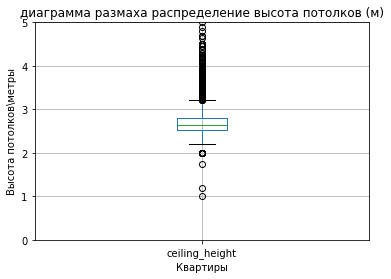

In [8]:
data.boxplot(column="ceiling_height")
plt.ylim(0,5)
plt.title("диаграмма размаха распределение высота потолков (м)")
plt.ylabel("Высота потолков\метры")
plt.xlabel("Квартиры")


Присутствует много выбросов.

In [9]:
data['ceiling_height'].median() 

2.65

Значит, выбросы не сильно влияют. Можно заполнить пропуски ceiling_height медианным значением.

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Для столбцов 
* airports_nearest 5542 расстояние до аэропорта (м)
* cityCenters_nearest 5519 расстояние до центра города (м)
* ponds_around3000 5518 число водоемов в радиусе 3 км
* parks_around3000 5518 число парков в радиусе 3 км
Проверим взаимосвязь между собой.

In [11]:
print(data.query("airports_nearest.isna() & cityCenters_nearest.isna() & ponds_around3000.isna() & parks_around3000.isna()").isnull().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              10
living_area              623
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             715
balcony                    0
locality_name              8
airports_nearest        5518
cityCenters_nearest     5518
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition          865
dtype: int64


Итак, взаимосвязь есть! Строки 5518 строк где NAN в всех столбцах 
* airports_nearest        5518
* cityCenters_nearest     5518
* parks_around3000        5518
* parks_nearest           5518
* ponds_around3000        5518
* ponds_nearest           5518

Вероятно, ошибка при получении автоматически данных. Необходимо доложить поставщику данных. Замена чем-то не представляется возможным. Оставляем как есть.

Столбец days_exposition 3181 пропуск данных.Проверим какое значение больше коррелирует со скоростью продажи.

In [12]:
print(data.query("airports_nearest.isna()").corr()["days_exposition"].sort_values())
print("Медиана",data["days_exposition"].median())

parks_nearest         -0.522644
cityCenters_nearest   -0.380713
ponds_nearest         -0.074461
floors_total          -0.065081
floor                 -0.044733
open_plan             -0.037684
studio                -0.026765
ponds_around3000      -0.025259
kitchen_area          -0.022926
total_images          -0.013033
balcony               -0.008543
ceiling_height        -0.001969
is_apartment           0.040293
last_price             0.041135
total_area             0.082418
rooms                  0.085514
living_area            0.086269
parks_around3000       0.409797
days_exposition        1.000000
airports_nearest            NaN
Name: days_exposition, dtype: float64
Медиана 95.0


Учитывая что хорошей корреляции со столбцами нет, пробуем заполнить значения просто медианой по столбцу.

In [13]:
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)
print(data['days_exposition'].isna().sum())
print("Медиана после замены",data["days_exposition"].median())


0
Медиана после замены 95.0


Находим недостающие площади кухонь. kitchen_area 2278 площадь кухни. Так как в столбце total_area нет пропущенных значений, будем высчитывать площадь кухни из общей площади. используя среднее отношение площади кухни к общей площади. 

In [14]:

print((data['living_area'].mean() / data['kitchen_area'].mean()))
data['kitchen_area'].fillna((data['kitchen_area'].mean() / data['total_area'].mean()) * data['total_area'], inplace=True)
print(data['kitchen_area'].isna().sum())
print("Медиана после замены",data["kitchen_area"].median())

3.260026581407244
0
Медиана после замены 9.0


Находим недостающие жилплощади. living_area 1903 жилая площадь. Так как в столбце total_area нет пропущенных значений, будем высчитывать жилплощадь из общей площади, используя среднее отношение жилплощади  к площади кухни. 

In [15]:
data['living_area'].fillna((data['living_area'].mean() / data['total_area'].mean()) * data['total_area'], inplace=True)
print(data['living_area'].isna().sum())
print("Медиана после замены",data["living_area"].median())

0
Медиана после замены 30.0


Этажи и название населенного пункта крайне важны для дальнейшего исследования, но их пропусков не так много - можно удалить.
* floors_total 86 всего этажей в доме
* locality_name 49 название населённого пункта

In [16]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
print(data['locality_name'].isna().sum())
print(data['floors_total'].isna().sum())

0
0


Проверим дубликаты в таблице.

In [17]:
data.duplicated().sum() # Их нет.

0

Необходимо привести к int  столбцы 

Контрольная проверка таблицы.

In [18]:
print(data.isnull().sum())
data.info()
data.describe()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_are

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.591303,5.878124,10.500277,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,169.203692
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.372806,4.871485,6.038042,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,206.497729
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Расчёты-и-добавление-результатов-в-таблицу

Добавим в таблицу цену квадратного метра:
    

In [19]:
data["price_m"]=data["last_price"]/data["total_area"]
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.785766,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим в таблицу день недели, месяц и год публикации объявления:

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Добавим в таблицу этаж квартиры; варианты: первый, последний, другой;


In [21]:
#Функция последовательно примениться к всем значениям floor.
def floor_category(data):
    floor = data['floor']
    if  floor == 1:
        return 'первый'
    elif floor == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
data["sort_floor"]=data.apply(floor_category,axis=1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


Добавим столбцы соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [22]:
def area_live_fraction(data):
    return (data["living_area"]/data["total_area"])
def area_kitchen_fraction(data):
    return (data["kitchen_area"]/data["total_area"])
data["area_live_fraction"]=data.apply(area_live_fraction,axis=1)
data["area_live_fraction"]=data["area_live_fraction"].round(2) #Сразу округлим до 2х цифр
data["area_kitchen_fraction"]=data.apply(area_kitchen_fraction,axis=1)
data["area_kitchen_fraction"]=data["area_kitchen_fraction"].round(2)#Сразу округлим до 2х цифр
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,95.0,120370.370370,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.57,0.18
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.32,0.41


Данные по условию задания в таблицу добавлены.

Приведем данные столбцов к int 

[
'last_price', 
'floors_total', 
'balcony', 
'airports_nearest', 
'cityCenters_nearest', 
'parks_around3000',
'parks_nearest', 
'ponds_around3000', 
'ponds_nearest', 
'days_exposition', 
'price_m',
'kitchen_area',
'living_area',
'total_area',
]


In [23]:
columns_int=[
'last_price', 
'floors_total', 
'balcony', 
'airports_nearest', 
'cityCenters_nearest', 
'parks_around3000',
'parks_nearest', 
'ponds_around3000', 
'ponds_nearest', 
'days_exposition', 
'price_m',
'kitchen_area',
'living_area',
'total_area',
]
for i in columns_int:
    data[i]=data[data[i].notnull()][i].astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,2.0,755.0,95,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,2.65,14,90,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,0.57,0.18
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,...,NaN,NaN,55,95065,0,9,2018,другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,False,...,0.0,NaN,155,99195,3,11,2017,другой,0.28,0.39
7,5,7915000,71,2019-04-18,2,2.65,24,40,22,False,...,0.0,NaN,95,110544,3,4,2019,другой,0.57,0.26
8,20,2900000,33,2018-05-23,1,2.65,27,15,26,False,...,NaN,NaN,189,87454,2,5,2018,другой,0.47,0.27
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,...,0.0,NaN,289,88524,6,2,2017,другой,0.71,0.11


Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра. Для наглядности выведем статистику по столбцам, чтобы быстрее определять характеристики будущих графиков.


In [24]:
#Создадим копию дата фрейма для записи нормальных значений.
data_live=data
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,area_live_fraction,area_kitchen_fraction
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.095226,2.070656,2.724530,10.675875,34.323106,5.878124,10.228474,0.593677,...,490.580448,0.769499,518.289509,169.203692,9.940539e+04,2.567367,6.401570,2017.371016,0.565318,0.186617
std,5.681156,1.091093e+07,35.668758,1.078591,0.991026,6.594823,22.374465,4.871485,6.051377,0.960660,...,341.572956,0.938669,278.009558,206.497729,5.038944e+04,1.788279,3.492948,1.037393,0.101125,0.069585
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656600e+04,1.000000,3.000000,2017.000000,0.500000,0.140000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.570000,0.180000
75%,14.000000,6.790000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,198.000000,1.142130e+05,4.000000,10.000000,2018.000000,0.630000,0.220000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.000000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.790000


<div class="alert alert-info"> <b>Комментарий студента:</b> Не заметил срузу, в задании необходимость рачета кореляций </div>


In [25]:
data_live.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,area_live_fraction,area_kitchen_fraction
total_images,1.000000,0.105026,0.116713,0.099759,0.004470,0.009822,0.102734,0.032781,0.010402,-0.028201,...,-0.006017,-0.011352,-0.003995,-0.040705,0.133189,-0.009325,0.004486,0.139238,-0.001657,-0.021279
last_price,0.105026,1.000000,0.653599,0.363191,0.064411,-0.006745,0.585699,0.026842,0.026981,-0.025084,...,-0.016529,0.160735,-0.085836,0.065208,0.736798,0.001357,0.002726,-0.042864,0.002631,-0.075578
total_area,0.116713,0.653599,1.000000,0.758734,0.080871,-0.075508,0.946107,-0.024561,0.029715,-0.071928,...,-0.021237,0.163626,-0.099993,0.117042,0.302460,-0.005617,0.004967,-0.079680,0.134269,-0.295823
rooms,0.099759,0.363191,0.758734,1.000000,0.047958,-0.227913,0.827296,-0.151341,0.000399,-0.146068,...,-0.053719,0.093600,-0.060119,0.098965,0.055680,-0.005207,-0.003916,-0.054492,0.463205,-0.551389
ceiling_height,0.004470,0.064411,0.080871,0.047958,1.000000,-0.026747,0.080326,-0.012604,0.146555,0.000381,...,-0.019055,0.063707,-0.047483,0.013197,0.099885,-0.009898,-0.002783,-0.000189,0.012298,0.008191
floors_total,0.009822,-0.006745,-0.075508,-0.227913,-0.026747,1.000000,-0.159236,0.678010,-0.026402,0.070224,...,0.097608,-0.122799,0.040003,-0.038453,0.148423,0.012542,0.016909,0.007883,-0.349982,0.328840
living_area,0.102734,0.585699,0.946107,0.827296,0.080326,-0.159236,1.000000,-0.089067,0.028723,-0.055743,...,-0.049145,0.149468,-0.086063,0.111204,0.232700,-0.004879,-0.000185,-0.071939,0.396504,-0.444833
floor,0.032781,0.026842,-0.024561,-0.151341,-0.012604,0.678010,-0.089067,1.000000,-0.013234,0.035946,...,0.072988,-0.076240,0.026467,-0.029342,0.129203,0.011017,0.020736,0.005404,-0.252892,0.230657
is_apartment,0.010402,0.026981,0.029715,0.000399,0.146555,-0.026402,0.028723,-0.013234,1.000000,-0.003641,...,-0.033553,0.024097,0.003303,0.011218,0.044794,-0.009473,0.002356,0.009289,0.002044,0.019339
studio,-0.028201,-0.025084,-0.071928,-0.146068,0.000381,0.070224,-0.055743,0.035946,-0.003641,1.000000,...,0.006923,0.000813,0.001838,-0.019034,0.015529,-0.000858,-0.000717,0.010860,0.086710,-0.007509


<AxesSubplot:>

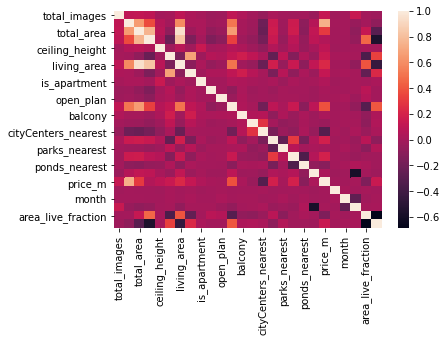

In [26]:

sns.heatmap(data_live.corr())

In [27]:
datacorr=data_live.corr()
datacorr['last_price'].sort_values(ascending = False)



 

last_price               1.000000
price_m                  0.736798
total_area               0.653599
living_area              0.585699
kitchen_area             0.514500
rooms                    0.363191
ponds_around3000         0.160735
parks_around3000         0.151492
total_images             0.105026
days_exposition          0.065208
ceiling_height           0.064411
is_apartment             0.026981
floor                    0.026842
balcony                  0.008568
month                    0.002726
area_live_fraction       0.002631
weekday                  0.001357
floors_total            -0.006745
open_plan               -0.008801
parks_nearest           -0.016529
studio                  -0.025084
airports_nearest        -0.026216
year                    -0.042864
area_kitchen_fraction   -0.075578
ponds_nearest           -0.085836
cityCenters_nearest     -0.206353
Name: last_price, dtype: float64

In [28]:
datacorr['price_m'].sort_values(ascending = False)

price_m                  1.000000
last_price               0.736798
kitchen_area             0.382867
total_area               0.302460
living_area              0.232700
ponds_around3000         0.191909
parks_around3000         0.185254
floors_total             0.148423
area_kitchen_fraction    0.144417
total_images             0.133189
floor                    0.129203
ceiling_height           0.099885
rooms                    0.055680
is_apartment             0.044794
days_exposition          0.031292
balcony                  0.023500
studio                   0.015529
year                     0.008627
open_plan                0.008293
parks_nearest            0.005905
month                   -0.001905
weekday                 -0.007117
airports_nearest        -0.039106
ponds_nearest           -0.106256
area_live_fraction      -0.141204
cityCenters_nearest     -0.317596
Name: price_m, dtype: float64

Изучим площадь.

Text(0, 0.5, 'Количество квартир')

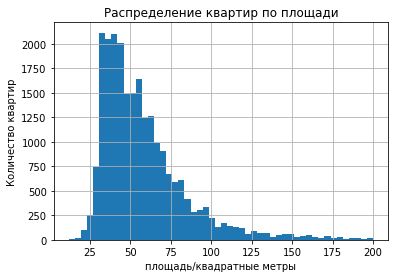

In [29]:
data_live['total_area'].hist(bins=50,range=(12, 200),)
plt.title("Распределение квартир по площади")
plt.xlabel('площадь/квадратные метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'площадь/квадратные метры')

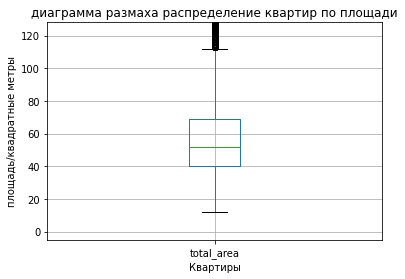

In [30]:
data_live.boxplot("total_area")
plt.title("диаграмма размаха распределение квартир по площади")
plt.ylim(-5, 128)
plt.xlabel('Квартиры')
plt.ylabel('площадь/квадратные метры')

Нормальные значения находятся в пределах 15-115 метров, оставим в таблице только их.


In [31]:
data_live=data_live.query('total_area>=15 and total_area<=115')

Изучим цену.


Text(0, 0.5, 'Количество квартир')

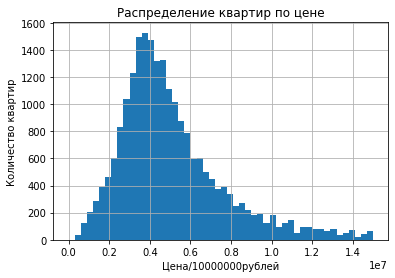

In [32]:
data_live['last_price'].hist(bins=50,range=(0, 15000000),)
plt.title("Распределение квартир по цене")
plt.xlabel('Цена/10000000рублей')
plt.ylabel('Количество квартир')

(-50000.0, 12000000.0)

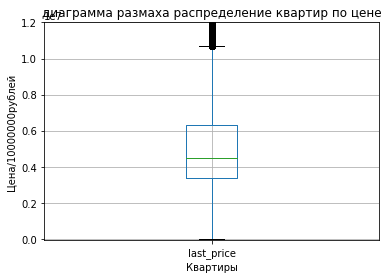

In [33]:
data_live.boxplot("last_price")
plt.title("диаграмма размаха распределение квартир по цене")
plt.xlabel('Квартиры')
plt.ylabel('Цена/10000000рублей')
plt.ylim(-50000, 12000000)

Нормальные значения находятся от близких к нулю до 11 миллионов. Непонятно, почему график так сильно сдвинут к нулю. Проверим значения с низкими ценами на квартиры до 400 000.

In [34]:
data_live.query('last_price<400000')



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
8793,7,12190,109,2019-03-20,2,2.75,25,32,25,False,...,0.0,NaN,8,111,2,3,2019,последний,0.29,0.37


Квартира не может стоить так мало при таких характеристиках. Удалим ее.

(-50000.0, 12000000.0)

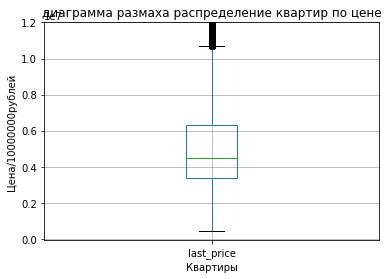

In [35]:
data_live=data_live.query('last_price>400000')
data_live.boxplot("last_price")
plt.title("диаграмма размаха распределение квартир по цене")
plt.xlabel('Квартиры')
plt.ylabel('Цена/10000000рублей')
plt.ylim(-50000, 12000000)

Теперь нижний диапазон несколько отодвинулся от нуля за счет удаления выброса.


Проверим число комнат.


Text(0, 0.5, 'Количество квартир')

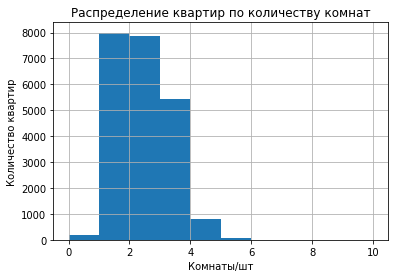

In [36]:
data_live['rooms'].hist(bins=10,range=(0,10))
plt.title("Распределение квартир по количеству комнат")
plt.xlabel('Комнаты/шт')
plt.ylabel('Количество квартир')

(-5.0, 10.0)

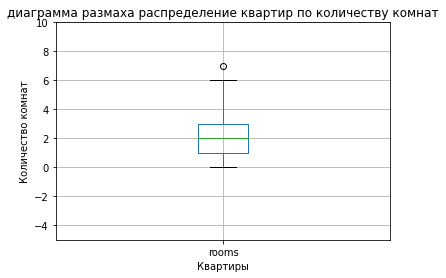

In [37]:
data_live.boxplot("rooms")
plt.title("диаграмма размаха распределение квартир по количеству комнат")
plt.xlabel('Квартиры')
plt.ylabel('Количество комнат')
plt.ylim(-5, 10)

Ожидаемо нормальное колличество комнат от 0 до 6.
Проверим сколько квартир больше 6 комнат.


In [38]:
data_live.query('rooms>6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
14603,12,13490000,100,2018-07-31,7,2.65,4,57,2,True,...,3.0,325.0,50,134095,1,7,2018,другой,0.57,0.18


Странная квартира, удалим ее.

In [39]:
data_live=data_live.query('rooms<7')

Проверим высоту потолков.

Text(0, 0.5, 'Количество квартир')

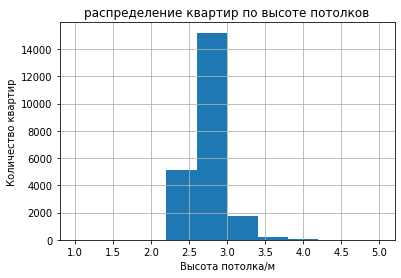

In [40]:
data_live['ceiling_height'].hist(bins=10,range=(1,5))
plt.title("распределение квартир по высоте потолков")
plt.xlabel('Высота потолка/м')
plt.ylabel('Количество квартир')

(2.0, 50.0)

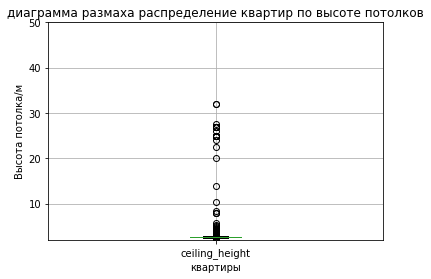

In [41]:
data_live.boxplot("ceiling_height")
plt.title("диаграмма размаха распределение квартир по высоте потолков")
plt.xlabel('квартиры')
plt.ylabel('Высота потолка/м')
plt.ylim(2, 50)

(2.0, 5.0)

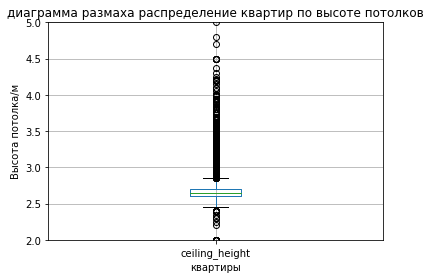

In [42]:
data_live.boxplot("ceiling_height")
plt.title("диаграмма размаха распределение квартир по высоте потолков")
plt.xlabel('квартиры')
plt.ylabel('Высота потолка/м')
plt.ylim(2, 5)

(2.4, 3.0)

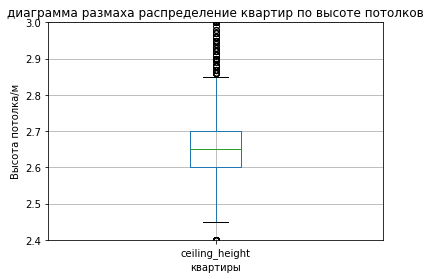

In [43]:
data_live.boxplot("ceiling_height")
plt.title("диаграмма размаха распределение квартир по высоте потолков")
plt.xlabel('квартиры')
plt.ylabel('Высота потолка/м')
plt.ylim(2.4, 3)

В выборке присутствуют как нормальные значения, так и запредельные, потолки более 10 метров трудно представить посмотрим на них, оставим в таблице значения между 2 и 2,7.



In [44]:
data_live.query('ceiling_height>5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
355,17,3600000,55,2018-07-12,2,25.0,5,32,2,False,...,NaN,NaN,259,65217,3,7,2018,другой,0.58,0.18
3148,14,2900000,75,2018-11-12,3,32.0,3,53,2,False,...,NaN,NaN,95,38666,0,11,2018,другой,0.71,0.11
3474,3,1400000,30,2018-03-16,1,8.0,5,15,2,False,...,NaN,NaN,125,46666,4,3,2018,другой,0.51,0.24
4643,0,4300000,45,2018-02-01,2,25.0,9,30,2,False,...,1.0,331.0,181,95555,3,2,2018,другой,0.67,0.16
4876,7,3000000,25,2017-09-27,0,27.0,25,17,17,False,...,NaN,NaN,28,120000,2,9,2017,другой,0.68,0.18
5076,0,3850000,30,2018-10-03,1,24.0,5,19,1,True,...,1.0,578.0,7,126229,2,10,2018,первый,0.64,0.18
5246,0,2500000,54,2017-10-13,2,27.0,5,30,3,False,...,NaN,NaN,540,46296,4,10,2017,другой,0.56,0.17
5669,4,4400000,50,2017-08-08,2,26.0,9,21,3,False,...,0.0,NaN,267,88000,1,8,2017,другой,0.43,0.14
5807,17,8150000,80,2019-01-09,2,27.0,36,41,13,False,...,3.0,80.0,38,101875,2,1,2019,другой,0.51,0.15
5863,20,5650000,45,2018-08-15,1,8.3,16,19,14,False,...,1.0,613.0,14,125555,2,8,2018,другой,0.43,0.18


In [45]:
data_live.query('ceiling_height<2.7 & ceiling_height>2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,...,NaN,NaN,55,95065,0,9,2018,другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,False,...,0.0,NaN,155,99195,3,11,2017,другой,0.28,0.39
7,5,7915000,71,2019-04-18,2,2.65,24,40,22,False,...,0.0,NaN,95,110544,3,4,2019,другой,0.57,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30,2017-07-07,1,2.65,5,17,4,False,...,NaN,NaN,413,45000,4,7,2017,другой,0.58,0.20
23693,9,4600000,62,2016-08-05,3,2.60,9,40,8,False,...,1.0,675.0,239,73717,4,8,2016,другой,0.64,0.13
23695,14,3100000,59,2018-01-15,3,2.65,5,38,4,False,...,NaN,NaN,45,52542,0,1,2018,другой,0.64,0.14
23696,18,2500000,56,2018-02-11,2,2.65,3,29,1,False,...,NaN,NaN,95,44091,6,2,2018,первый,0.52,0.18


Изучим время продажи квартиры.


Text(0, 0.5, 'Количество квартир')

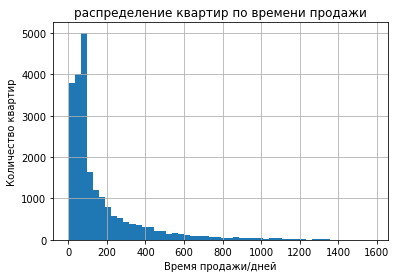

In [46]:
data_live['days_exposition'].hist(bins=50,range=(1,1580))
plt.title("распределение квартир по времени продажи")
plt.xlabel('Время продажи/дней')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Время продажи/дней')

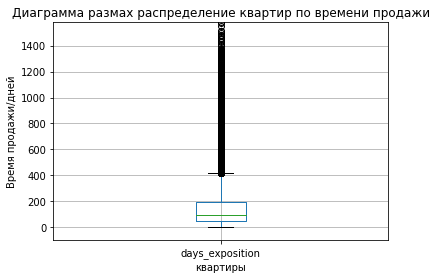

In [47]:
data_live.boxplot("days_exposition")
plt.ylim(-100, 1580)
plt.title("Диаграмма размах распределение квартир по времени продажи")
plt.xlabel('квартиры')
plt.ylabel('Время продажи/дней')

среднее 164.93927741012342
медиана 95.0


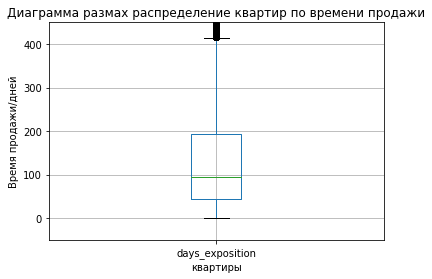

In [48]:
data_live.boxplot("days_exposition")
plt.ylim(-50, 450)
plt.title("Диаграмма размах распределение квартир по времени продажи")
plt.xlabel('квартиры')
plt.ylabel('Время продажи/дней')
print('среднее',data_live["days_exposition"].mean())
print('медиана',data_live["days_exposition"].median())



Учитывая график, большая часть квартир продается от 0 до 410 дней. Быстрой продажей можно считать до 40 дней. Если продажа шла больше 195 дней, значит долгая. Необходимо убрать из таблицы выбывающие значения.

In [49]:
data_live = data_live.query('days_exposition<410')
data_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20071 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           20071 non-null  int64         
 1   last_price             20071 non-null  int64         
 2   total_area             20071 non-null  int64         
 3   first_day_exposition   20071 non-null  datetime64[ns]
 4   rooms                  20071 non-null  int64         
 5   ceiling_height         20071 non-null  float64       
 6   floors_total           20071 non-null  int64         
 7   living_area            20071 non-null  int64         
 8   floor                  20071 non-null  int64         
 9   is_apartment           20071 non-null  bool          
 10  studio                 20071 non-null  bool          
 11  open_plan              20071 non-null  bool          
 12  kitchen_area           20071 non-null  int64         
 13  b

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Text(0, 0.5, 'цена')

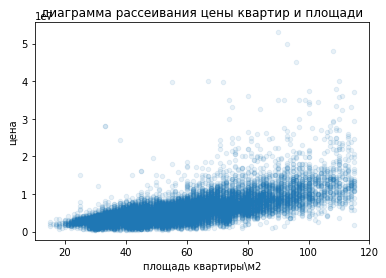

In [50]:
data_live.plot(y='last_price', x='total_area', kind='scatter', alpha=0.1)
plt.title("диаграмма рассеивания цены квартир и площади")
plt.xlabel('площадь квартиры\м2')
plt.ylabel('цена')

C увеличением площади стоимость квартиры увеличиваеться.

Text(0, 0.5, 'цена')

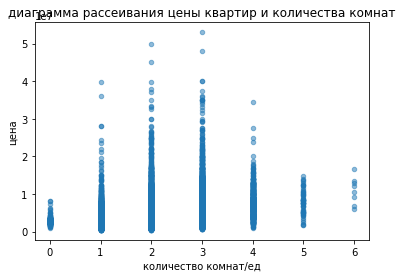

In [51]:
data_live.plot(y='last_price', x='rooms', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квартир и количества комнат")
plt.xlabel('количество комнат/ед')
plt.ylabel('цена')

С увеличением количества комнат цена увеличивается, самые дорогие квартиры будут трехкомнатные, далее цена уменьшаеться с уменьшением количества комнат.

Text(0, 0.5, 'цена')

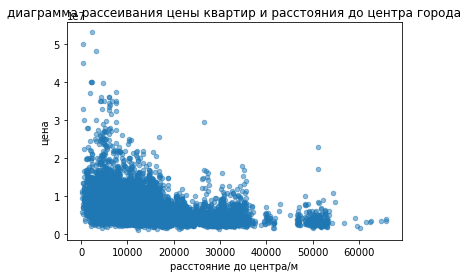

In [52]:
data_live.plot(y='last_price', x='cityCenters_nearest', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квартир и расстояния до центра города")
plt.xlabel('расстояние до центра/м')
plt.ylabel('цена')

Ожидаемо самые дорогие квартиры будут в центре, цена уменьшается от центра к периферии.

Text(0, 0.5, 'цена')

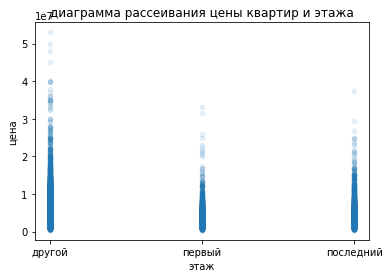

In [53]:
data_live.plot(y='last_price', x='sort_floor', kind='scatter', alpha=0.1)
plt.title("диаграмма рассеивания цены квартир и этажа")
plt.xlabel('этаж')
plt.ylabel('цена')

Есть связь этажа и цены на квартиру. Квартиры на первом и последнем этаже чаще стоят дешевле.

Зависимость стоимости квартиры от даты размещения: дня недели, месяца и года.

Text(0, 0.5, 'Цена квадратного метра/рублей')

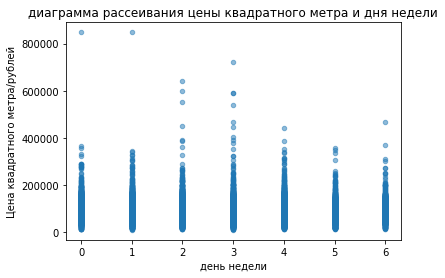

In [54]:
data_live.plot(y='price_m', x='weekday', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра и дня недели")
plt.xlabel('день недели')
plt.ylabel('Цена квадратного метра/рублей')

Странно, но зависимость есть - самые дорогие квартиры выставляются на продажу в середине недели.

Зависимость стоимости квартиры от месяца.

Text(0, 0.5, 'Цена квадратного метра/рублей')

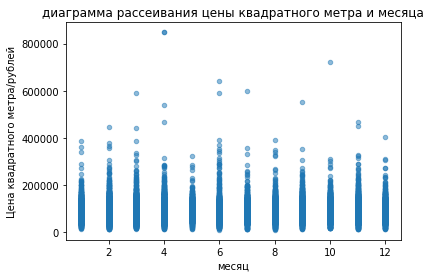

In [55]:
data_live.plot(y='price_m', x='month', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра и месяца")
plt.xlabel('месяц')
plt.ylabel('Цена квадратного метра/рублей')

Не вижу выраженной зависимости стоимости квартиры от месяца размещения объявления. Летом отмечается некоторое снижение стоимости квартир.

Text(0, 0.5, 'Цена квадратного метра/рублей')

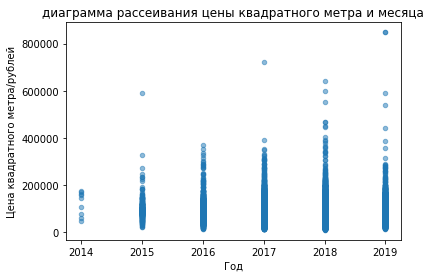

In [56]:
data_live.plot(y='price_m', x='year', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра и месяца")
plt.xlabel('Год')
plt.ylabel('Цена квадратного метра/рублей')

Зависимость прямая - квартиры дорожают год от года, особенно это заметно в 2018 году.

Выбераю 10 населённых пунктов с наибольшим числом объявлений.

In [57]:
big_localyty=data_live["locality_name"].value_counts().head(10).index
#создам дата фрейм для городов.
big_localyty_city = pd.DataFrame({"city":big_localyty}) 
data_price=[]
for city in big_localyty:
    data_price.append(data_live.query('locality_name == @city')['price_m'].mean())
big_localyty_city["mean_price"]=data_price
big_localyty_city.sort_values(by = 'mean_price',ascending = False).head(15)

,city,mean_price
0,Санкт-Петербург,110590.085769
4,Пушкин,102414.153355
8,деревня Кудрово,92660.885057
6,посёлок Парголово,89830.959596
1,посёлок Мурино,85916.727463
2,посёлок Шушары,78732.852130
5,Колпино,75295.126214
7,Гатчина,69241.200743
3,Всеволожск,69014.210375
9,Выборг,58349.702439


Text(0.5, 1.0, 'Топ 10 населенных пунктов')

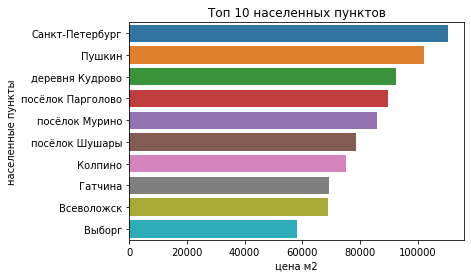

In [58]:
sns.barplot(x=big_localyty_city.sort_values(by = 'mean_price',ascending = False)["mean_price"],y=big_localyty_city.sort_values(by = 'mean_price',ascending = False)['city']).set(xlabel='цена м2', ylabel='населенные пункты')
plt.title("Топ 10 населенных пунктов")

Ожидаемо. Санкт-Петербург - самый дорогой город.

Добавляю в таблицу столбец с расстоянием до центра в километрах.

In [59]:
spb_area=data_live.query('locality_name=="Санкт-Петербург" & cityCenters_nearest')
spb_area['cityCenters_nearest_km']=spb_area.loc[:, 'cityCenters_nearest']/1000
spb_area['cityCenters_nearest_km']=spb_area.loc[:, 'cityCenters_nearest_km'].round().astype(int,errors='raise')
spb_area["cityCenters_nearest_km"]


/tmp/ipykernel_48/275302914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_area['cityCenters_nearest_km']=spb_area.loc[:, 'cityCenters_nearest']/1000
/tmp/ipykernel_48/275302914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_area['cityCenters_nearest_km']=spb_area.loc[:, 'cityCenters_nearest_km'].round().astype(int,errors='raise')


0        16
4         8
7        12
9        15
10       14
         ..
23686    12
23687    17
23688    14
23689    16
23690     6
Name: cityCenters_nearest_km, Length: 12991, dtype: int64

Добавим в таблицу столбец стоимости одного километра.

In [60]:
spb_area['price_km']=(spb_area['last_price']/spb_area['cityCenters_nearest_km'])


/tmp/ipykernel_48/2063827208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_area['price_km']=(spb_area['last_price']/spb_area['cityCenters_nearest_km'])


Попробуем выяснить какая область входит в центр Санкт-Петербурга. 

Text(0, 0.5, 'Цена километра')

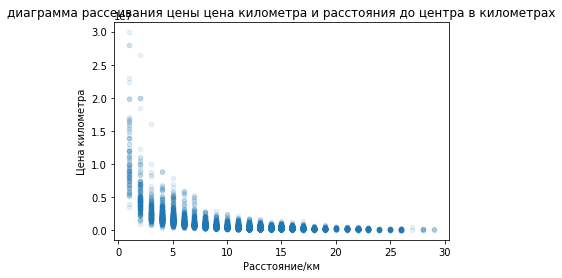

In [61]:
spb_area.plot(y='price_km', x='cityCenters_nearest_km', kind='scatter', alpha=0.1)
plt.title("диаграмма рассеивания цены цена километра и расстояния до центра в километрах")
plt.xlabel('Расстояние/км')
plt.ylabel('Цена километра')

Резкое снижение цены происходит после 7 км от центра. Будем считать, что центр это все, что в радиусе 7 км. Проверим это по цене продажи.

Text(0, 0.5, 'Цена квартиры')

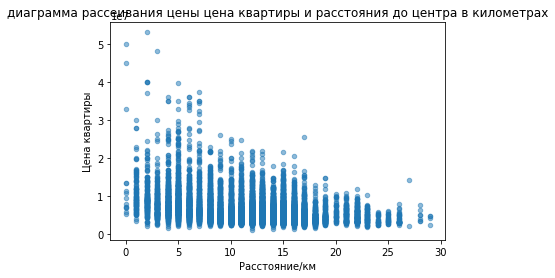

In [62]:
spb_area.plot(y='last_price', x='cityCenters_nearest_km', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены цена квартиры и расстояния до центра в километрах")
plt.xlabel('Расстояние/км')
plt.ylabel('Цена квартиры')

Подтверждается. Центр - это 7 км.

Text(0, 0.5, 'Цена квадратного метра')

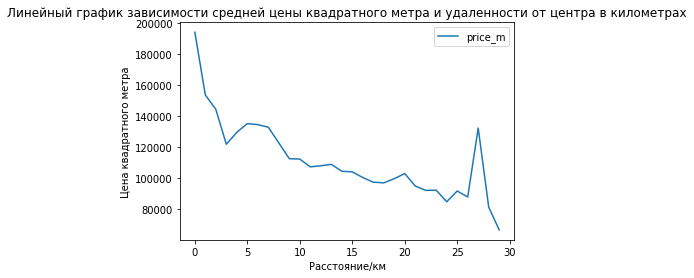

In [63]:
spb_area.pivot_table(index='cityCenters_nearest_km', values='price_m', aggfunc ='mean').plot( kind='line')
plt.title("Линейный график зависимости средней цены квадратного метра и удаленности от центра в километрах")
plt.xlabel('Расстояние/км')
plt.ylabel('Цена квадратного метра')

Text(0, 0.5, 'Цена квартиры')

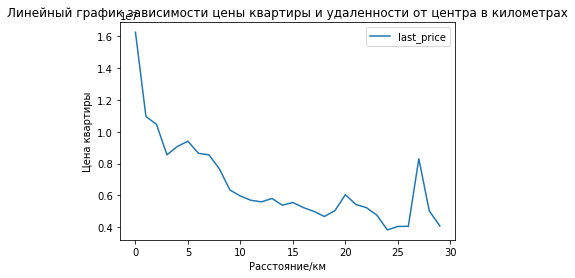

In [64]:
spb_area.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc ='mean').plot( kind='line')
plt.title("Линейный график зависимости цены квартиры и удаленности от центра в километрах")
plt.xlabel('Расстояние/км')
plt.ylabel('Цена квартиры')

<div class="alert alert-info"> <b>Комментарий студента:</b> После 7 км получаю резкое подение, но сказать что графики нагляднее не могу, может чтото не правильно делаю?</div>

Выделяем квартиры в радиусе 7 км.


In [65]:
spb_area_center=spb_area.query('cityCenters_nearest_km<=7')
spb_area_center.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m,weekday,month,year,sort_floor,area_live_fraction,area_kitchen_fraction,cityCenters_nearest_km,price_km
24,8,6500000,97,2015-10-31,2,2.65,3,46,1,False,...,265,66872,5,10,2015,первый,0.48,0.20,2,3.250000e+06
94,3,3500000,29,2019-04-26,1,2.50,5,15,2,False,...,4,118644,4,4,2019,другой,0.53,0.19,7,5.000000e+05
99,32,9600000,90,2017-09-26,4,2.65,5,67,2,False,...,104,106666,1,9,2017,другой,0.74,0.09,3,3.200000e+06
111,4,4590000,40,2017-05-29,1,2.65,6,18,1,False,...,31,114750,0,5,2017,первый,0.45,0.25,6,7.650000e+05
114,5,4000000,21,2019-02-07,1,2.90,8,8,7,False,...,95,186915,3,2,2019,другой,0.39,0.29,6,6.666667e+05
136,16,6500000,51,2018-08-01,2,3.45,6,25,2,False,...,163,125482,2,8,2018,другой,0.49,0.14,4,1.625000e+06
137,11,13310800,85,2018-01-01,2,2.70,10,31,5,False,...,340,156413,0,1,2018,другой,0.37,0.32,4,3.327700e+06
138,8,4800000,40,2017-11-18,2,2.65,3,29,2,False,...,80,120000,5,11,2017,другой,0.72,0.15,3,1.600000e+06
141,8,6500000,32,2019-02-27,1,2.65,5,18,5,False,...,95,199386,2,2,2019,последний,0.57,0.17,5,1.300000e+06
143,9,2990000,30,2016-06-08,1,2.50,9,20,9,False,...,60,99666,2,6,2016,последний,0.67,0.19,6,4.983333e+05


Изучим следующие параметры: площадь, цена, число комнат, высота потолков характерные для квартир в центре.

Text(0, 0.5, 'Количество квартир')

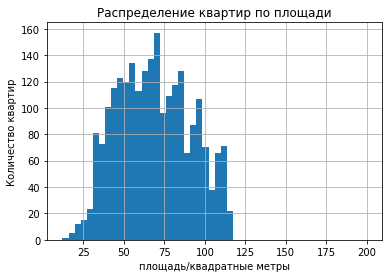

In [66]:
spb_area_center['total_area'].hist(bins=50,range=(12, 200),)
plt.title("Распределение квартир по площади")
plt.xlabel('площадь/квадратные метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'площадь/квадратные метры')

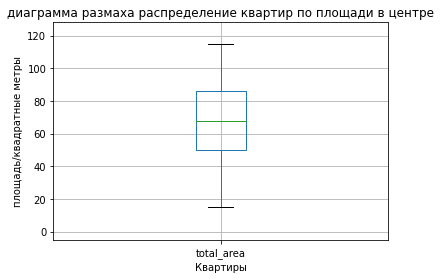

In [67]:
spb_area_center.boxplot("total_area")
plt.title("диаграмма размаха распределение квартир по площади в центре")
plt.ylim(-5, 128)
plt.xlabel('Квартиры')
plt.ylabel('площадь/квадратные метры')

Центр Санкт-Петербург несколько отличаеться от всей области, в центре преобладают квартиры большей площади между 50 и 75 метрами.


Изучим цены в центре Санкт-Петербурга.

Text(0, 0.5, 'Количество квартир')

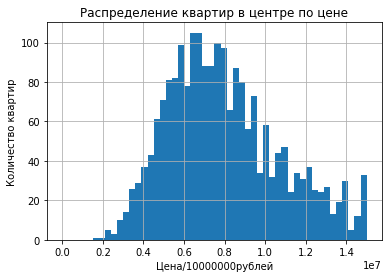

In [68]:
spb_area_center['last_price'].hist(bins=50,range=(0, 15000000),)
plt.title("Распределение квартир в центре по цене")
plt.xlabel('Цена/10000000рублей')
plt.ylabel('Количество квартир')

(-50000.0, 12000000.0)

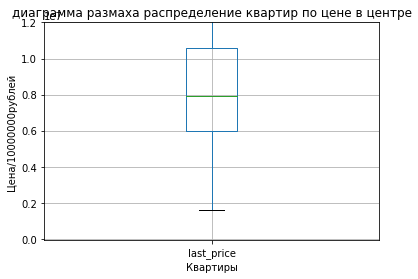

In [69]:
spb_area_center.boxplot("last_price")
plt.title("диаграмма размаха распределение квартир по цене в центре")
plt.xlabel('Квартиры')
plt.ylabel('Цена/10000000рублей')
plt.ylim(-50000, 12000000)

Центр Санкт-Петербурга несколько отличается от всей области. В центре преобладают квартиры ценой от 6 до 8 миллионов, в области преобладают квартиры ценой от 2.5 до 4.5 милионов.

Изучим число комнат.


Text(0, 0.5, 'Количество квартир')

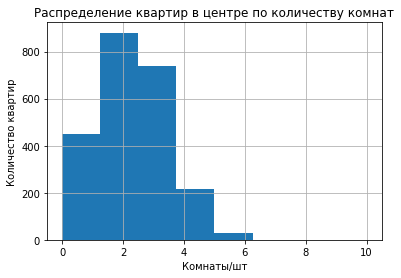

In [70]:
spb_area_center['rooms'].hist(bins=8,range=(0,10))
plt.title("Распределение квартир в центре по количеству комнат")
plt.xlabel('Комнаты/шт')
plt.ylabel('Количество квартир')

Центр Санкт-Петербурга отличается наличием большего количества однокомнатных квартир, меньшим количеством 4-комнатных квартир. Преобладают 2-3-хкомнатные.

Проверим высоту потолков.

Text(0, 0.5, 'Количество квартир')

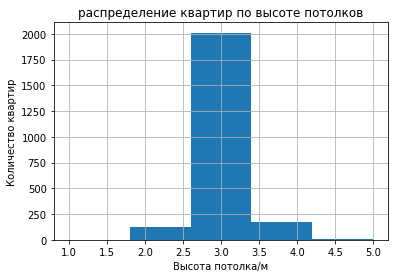

In [71]:
spb_area_center['ceiling_height'].hist(bins=5,range=(1,5))
plt.title("распределение квартир по высоте потолков")
plt.xlabel('Высота потолка/м')
plt.ylabel('Количество квартир')

В центре Санкт-Петербурга наблюдается тенденция к большей высоте потолков. Потолков от 2,7 м до 3.3 значительно больше. 

Оценим факторы которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Text(0, 0.5, 'цена')

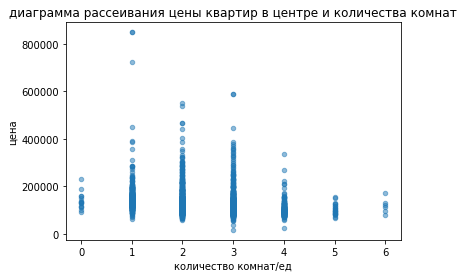

In [72]:
spb_area_center.plot(y='price_m', x='rooms', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квартир в центре и количества комнат")
plt.xlabel('количество комнат/ед')
plt.ylabel('цена')

Для центра Санкт-Петербург наблюдается меньшее влияние количества комнат на цену квартиры.

Проверим влияние этажа на цену.

Text(0, 0.5, 'цена')

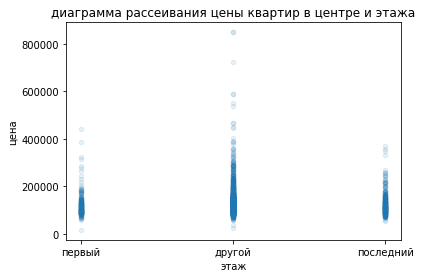

In [73]:
spb_area_center.plot(y='price_m', x='sort_floor', kind='scatter', alpha=0.1)
plt.title("диаграмма рассеивания цены квартир в центре и этажа")
plt.xlabel('этаж')
plt.ylabel('цена')

В центре Санкт-Петербурга правило первого и последнего этажа по-прежнему работает, квартиры на этих этажах значительно дешевле.


Проверим удаленность от центра для центра Санкт-Петербурга.

Text(0, 0.5, 'Цена квадратного метра')

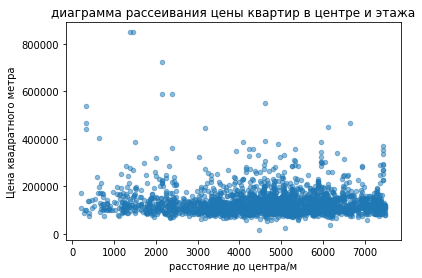

In [74]:
spb_area_center.plot(y='price_m', x='cityCenters_nearest', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квартир в центре и этажа")
plt.xlabel('расстояние до центра/м')
plt.ylabel('Цена квадратного метра')

Влияние близости квартиры к центру почти отсутствует, легкая тенденция к удешевлению квартир чуть дальше от центра.

Проверим влияние даты размещения объявления. День недели.

Text(0, 0.5, 'Цена квадратного метра/рублей')

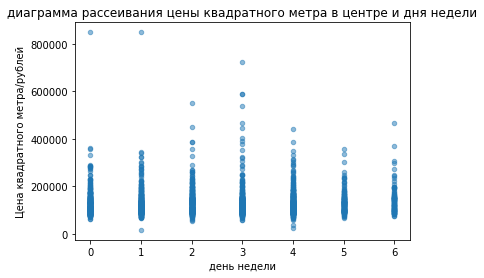

In [75]:
spb_area_center.plot(y='price_m', x='weekday', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра в центре и дня недели")
plt.xlabel('день недели')
plt.ylabel('Цена квадратного метра/рублей')

Выраженного влияния дня недели на цену квартиры не наблюдается,отмечается, что в рабочие дни квартиры на продажу выставляют несколько дороже.

Влияние месяца подачи объявления на цену квартиры.

Text(0, 0.5, 'Цена квадратного метра/рублей')

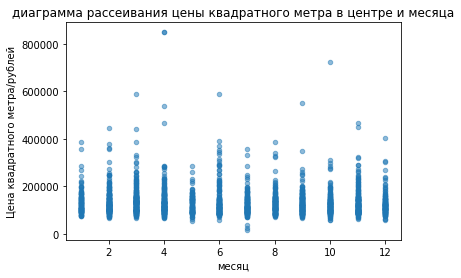

In [76]:
spb_area_center.plot(y='price_m', x='month', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра в центре и месяца")
plt.xlabel('месяц')
plt.ylabel('Цена квадратного метра/рублей')

Выраженного влияния месяца на цену квартиры не наблюдается, хотя в летние месяцы квартиры выставляют на продажу несколько дешевле.

Влияние года продажи на цену квартиры.

Text(0, 0.5, 'Цена квадратного метра/рублей')

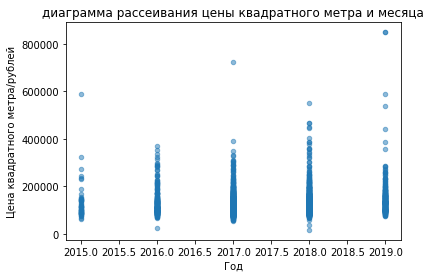

In [77]:
spb_area_center.plot(y='price_m', x='year', kind='scatter', alpha=0.5)
plt.title("диаграмма рассеивания цены квадратного метра и месяца")
plt.xlabel('Год')
plt.ylabel('Цена квадратного метра/рублей')

Цена квартир с каждым годом увеличивается, причем до 2018 года эта тенденция более выражена. В 2019 же году цены на жилье несколько снизились.

## Общий вывод


После изучения архива объявлений о продаже квартир в Санкт-Петербурге и области. 

На этапе подготовки данных: 
* заполнены пропущенные значения.
* изменены типы данных.
* посчитано и добавлено в таблицу: цена квадратного метра.
* посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления.
* посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой.
* посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей.
* Убраны редкие и выбивающиеся значения.

Проведен исследовательский анализ  данных, выводы и ответы на вопросы:

* Учитывая график, большая часть квартир продается от 0 до 410 дней. Быстрой продажей можно считать до 40 дней. Если продажа шла больше 195 дней, значит долгая.
* Ожидаемо, что Санкт-Петербург - самый дорогой город по жилой недвижимости, самый дешевый - Выборг.
* Квартиры на первом и последнем этаже дешевле, правило действует и для столицы, и для области.
* Удаление от центра уменьшает стоимость квартиры.
* В центр Санкт-Петербурга существует зона 7 км, которая отличается от общей картины. Квартиры в этой зоне большие по площади, высоте потолков, количеству комнат, цена на эти квартиры резко выше (до 3-х раз).
* День недели влияет на цену квартиры не так значительно. В середине недели выкладывают на продажу более дорогие квартиры, чем в выходные.
* Месяц выкладки объявления тоже влияет на цену квартиры. Квартиры выставленные в летние месяцы несколько дешевле.
* Год продажи влияет на цену значительно, цена год от года увеличивается.
